# MLflow with Microsoft Azure Machine Learning.

MLflow is an open source platform used to manage machine learning lifecycle, including experimentation, reproducibility, deployment and a central model registery. They are characterized by four components: MLflow Tracking (record and query experiments), MLflow Projects (packaging of code for easy reproducibility), MLflow Models (deploying ML models in different environments) and MLflow Registery (sotring, annotating, discovering and managing mdoels in a central repository). Refer [this](https://mlflow.org/) link for more details. Refer [video 1](https://databricks.com/session_eu19/mlflow-and-azure-machine-learning-the-power-couple-for-ml-lifecycle-management), [video 2](https://www.youtube.com/watch?v=2DLG1yo8JxM) and [this link](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-use-mlflow) to get an idea about why and how to use MLflow with Azure ML.

This notebook demonstates how one could integrate MLflow with Microsoft Azure ML so that we can leverage the advanatages of both platforms.

In [25]:
# importing necessary libraries
# refer to the requirements.txt file to know the dependencies

import os
import mlflow
import azureml.core
from dotenv import load_dotenv
from azureml.core import Workspace
from azureml.mlflow import get_portal_url
from IPython.core.display import display, HTML

print(f"Azure-core Python SDK version -> {azureml.core.VERSION}")
print(f"MLflow version -> {mlflow.version.VERSION}")
load_dotenv()

Azure-core Python SDK version -> 1.28.0
MLflow version -> 1.17.0


True

In [6]:
# fetching our workspace

workspace = Workspace.get(name=os.getenv("WORKSPACE_NAME", None),
                          subscription_id=os.getenv("SUBSCRIPTION_ID", None),
                          resource_group=os.getenv("RESOURCE_GROUP", None))
print(f'''Workspace name: {workspace.name}\nWorkspace region: {workspace.location}\nWorkspace subscription ID: {workspace.subscription_id[:3]}---xxxx---{workspace.subscription_id[-3:]}\nWorkspace resource group: {workspace.resource_group}''')

Workspace name: ML_WORKSPACE_VERSION_1
Workspace region: centralindia
Workspace subscription ID: 200---xxxx---ee2
Workspace resource group: ML_VERSION_1


In [7]:
# linking MLflow tracking to the Azure ML workspace (basically, exchanging information between MLflow and Azure ML).

mlflow.set_tracking_uri(uri=workspace.get_mlflow_tracking_uri())

In [15]:
# setting up an experiment

experiment_name = "digit-recognizer-mlflow-experiment-2"
experiment = mlflow.set_experiment(experiment_name=experiment_name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


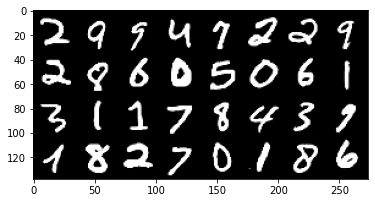

True

DEVICE - cuda || EPOCHS - 10 || LEARNING RATE - 0.001.


EPOCH - 1/10 || START AT - 19:23:45 21|05|2021 || LEARNING RATE - 0.001

	Train Step - 500/1875 | Train Step Loss: 1.91559 | Time: 3.08s.

	Train Step - 1000/1875 | Train Step Loss: 0.48632 | Time: 3.07s.

	Train Step - 1500/1875 | Train Step Loss: 0.34115 | Time: 2.98s.

	EPOCH - 1/10 || TRAIN LOSS - 0.79103 || TIME ELAPSED - 11.82s.


EPOCH - 2/10 || START AT - 19:23:57 21|05|2021 || LEARNING RATE - 0.001

	Train Step - 500/1875 | Train Step Loss: 0.24927 | Time: 3.31s.

	Train Step - 1000/1875 | Train Step Loss: 0.21532 | Time: 3.15s.

	Train Step - 1500/1875 | Train Step Loss: 0.19455 | Time: 3.00s.

	EPOCH - 2/10 || TRAIN LOSS - 0.20722 || TIME ELAPSED - 12.14s.


EPOCH - 3/10 || START AT - 19:24:09 21|05|2021 || LEARNING RATE - 0.001

	Train Step - 500/1875 | Train Step Loss: 0.15933 | Time: 3.02s.

	Train Step - 1000/1875 | Train Step Loss: 0.14023 | Time: 3.01s.

	Train Step - 1500/1875 | Train Step Loss: 0.13246 | 

In [31]:
# running the experiment

with mlflow.start_run() as run:
    display(HTML(f"<a href={get_portal_url(run)} target='_blank'>Click the link to checkout the Azure ML run details : {run.info.run_uuid}</a>"))
    %run train_cloud.py --mlflow True